# 聚合Tif图像转numpy数组并输出
* 读取、分析与绘制测试
* 由于tif图像以地图左上为初始坐标，处理时需上下颠倒
* 原遥感影像只有北纬90度到南纬60度的数据，需补全
* 遍历2015到2021年tif，输出为npy格式

In [1]:
import numpy as np
import pandas as pd
from osgeo import gdal

In [4]:
testTif = gdal.Open("H:/MOD17A3HGFv061/aggregate/MOD17A3HGF.A2015001.tif")

test_width = testTif.RasterXSize  # 栅格矩阵的列数
test_height = testTif.RasterYSize  # 栅格矩阵的行数
test_bands = testTif.RasterCount  # 波段数

print(test_width, test_height, test_bands)

360 150 1


In [5]:
#仿射矩阵，左上角像素的大地坐标和像素分辨率。
#共有六个参数，分表代表左上角x坐标；东西方向上图像的分辨率；如果北边朝上，地图的旋转角度，0表示图像的行与x轴平行；左上角y坐标；
#如果北边朝上，地图的旋转角度，0表示图像的列与y轴平行；南北方向上地图的分辨率。
test_geotrans = testTif.GetGeoTransform()
test_geotrans

(-179.99998850914588,
 0.9999999555900719,
 0.0,
 89.99999625816666,
 0.0,
 -0.9999999555900719)

In [8]:
# 用ReadAsArray(<xOff>, <yOff>, <xSize>, <ySize>)，读出从(xOff,yOff)开始，大小为(xSize,ySize)的矩阵。
testBand = testTif.GetRasterBand(1)
testData = testBand.ReadAsArray(0, 0, test_width, test_height)

testData

array([[-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       ...,
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38]], dtype=float32)

In [9]:
type(testData)

numpy.ndarray

In [10]:
testDF = pd.DataFrame(testData)
testDF.describe()

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,...,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
std,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
min,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,...,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
25%,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,...,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
50%,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,...,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
75%,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,...,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
max,1.582746e+04,1.334596e+04,1.273629e+04,1.324308e+04,1.382030e+04,1.629796e+04,1.105334e+04,1.260427e+04,1.247800e+04,1.055933e+04,...,1.513272e+04,1.353238e+04,1.554423e+04,1.802432e+04,1.741686e+04,1.638774e+04,1.630261e+04,1.711983e+04,1.863250e+04,1.525190e+04


In [11]:
testData.shape

(150, 360)

In [12]:
testDF.info

<bound method DataFrame.info of               0             1             2             3             4    \
0   -3.402823e+38 -3.402823e+38 -3.402823e+38 -3.402823e+38 -3.402823e+38   
1   -3.402823e+38 -3.402823e+38 -3.402823e+38 -3.402823e+38 -3.402823e+38   
2   -3.402823e+38 -3.402823e+38 -3.402823e+38 -3.402823e+38 -3.402823e+38   
3   -3.402823e+38 -3.402823e+38 -3.402823e+38 -3.402823e+38 -3.402823e+38   
4   -3.402823e+38 -3.402823e+38 -3.402823e+38 -3.402823e+38 -3.402823e+38   
..            ...           ...           ...           ...           ...   
145 -3.402823e+38 -3.402823e+38 -3.402823e+38 -3.402823e+38 -3.402823e+38   
146 -3.402823e+38 -3.402823e+38 -3.402823e+38 -3.402823e+38 -3.402823e+38   
147 -3.402823e+38 -3.402823e+38 -3.402823e+38 -3.402823e+38 -3.402823e+38   
148 -3.402823e+38 -3.402823e+38 -3.402823e+38 -3.402823e+38 -3.402823e+38   
149 -3.402823e+38 -3.402823e+38 -3.402823e+38 -3.402823e+38 -3.402823e+38   

              5             6             7

In [13]:
testData[testData == testData.min()] = -9999.0

In [14]:
testData

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)

In [16]:
fill = np.ones((30, 360)) * -9999.0
fill

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]])

In [17]:
testData = np.vstack((testData, fill))
testData.shape

(180, 360)

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

plt.rcParams['font.sans-serif']=['SimHei']  # 中文
plt.rcParams['axes.unicode_minus']=False    # 负号

C:\Users\alzio\AppData\Local\Temp\ipykernel_22852\2304188365.py:19: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  mapPlot.cmap.set_under('w')  # 设置底色


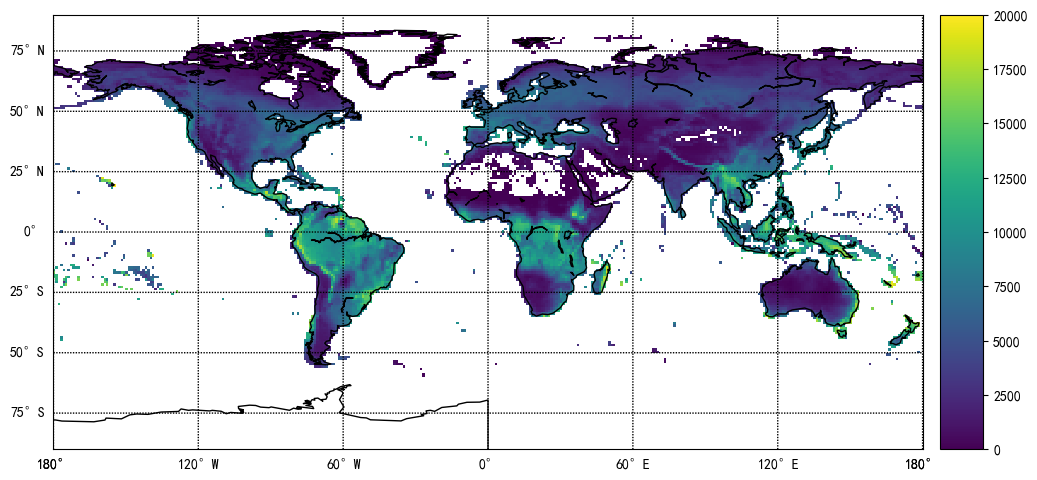

In [20]:
longitude = np.linspace(-179.5, 179.5, 360)
latitude = np.linspace(-89.5,89.5,180)
lon, lat = np.meshgrid(longitude, latitude)

plt.rcParams['figure.figsize'] = (12.0, 8.0)
Map = Basemap(llcrnrlon=-180., llcrnrlat=-90., urcrnrlon=180., urcrnrlat=90.)
Map.drawcoastlines()
parallels = np.arange(-75.,76,25.)
# labels = [left,right,top,bottom]
Map.drawparallels(parallels,labels=[True,False,False,False])
meridians = np.arange(0.,361.,60.)
Map.drawmeridians(meridians,labels=[False,False,False,True])

x, y = Map(lon, lat)

testData = np.flip(testData, axis=0)  # 坐标原因，需要上下颠倒

mapPlot = Map.pcolor(x, y, testData, cmap='viridis', vmin=0.0, vmax=20000.0)
mapPlot.cmap.set_under('w')  # 设置底色
cbar=Map.colorbar(mapPlot, fraction=0.023)
plt.show()

## 遍历输出为npy

In [2]:
width = 360
height = 150
fill = np.ones((30, 360)) * -9999.0
in_folder = 'H:/NPP/MOD17A3HGFv061/interpolation/'
out_folder = 'H:/NPP/MOD17A3HGFv061/npy/'

for year in range(2014, 2022):
    tif = gdal.Open(in_folder + f"{year}.tif")
    band = tif.GetRasterBand(1)
    data = band.ReadAsArray(0, 0, width, height)
    data[data == data.min()] = -9999.0
    data = np.vstack((data, fill))
    data = np.flip(data, axis=0)  # 磁场颠佬
    np.save(out_folder + f"MOD17A3HGFv061_{year}.npy", data)

C:\Users\alzio\AppData\Local\Temp\ipykernel_19348\283216051.py:19: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  mapPlot.cmap.set_under('w')  # 设置底色


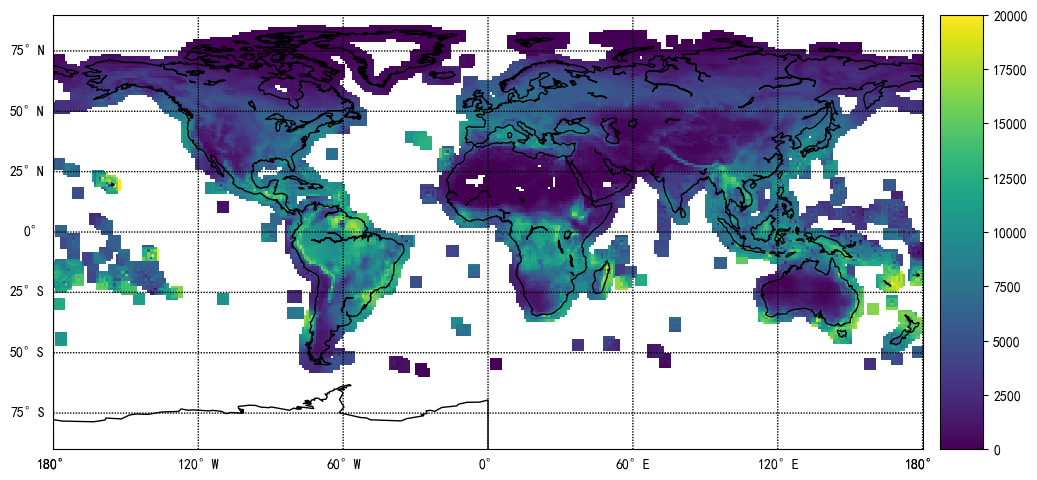

In [5]:
test = np.load(out_folder + "MOD17A3HGFv061_2014.npy")

longitude = np.linspace(-179.5, 179.5, 360)
latitude = np.linspace(-89.5,89.5,180)
lon, lat = np.meshgrid(longitude, latitude)

plt.rcParams['figure.figsize'] = (12.0, 8.0)
Map = Basemap(llcrnrlon=-180., llcrnrlat=-90., urcrnrlon=180., urcrnrlat=90.)
Map.drawcoastlines()
parallels = np.arange(-75.,76,25.)
# labels = [left,right,top,bottom]
Map.drawparallels(parallels,labels=[True,False,False,False])
meridians = np.arange(0.,361.,60.)
Map.drawmeridians(meridians,labels=[False,False,False,True])

x, y = Map(lon, lat)

mapPlot = Map.pcolor(x, y, test, cmap='viridis', vmin=0.0, vmax=20000.0)
mapPlot.cmap.set_under('w')  # 设置底色
cbar=Map.colorbar(mapPlot, fraction=0.023)
plt.show()

In [24]:
pd.DataFrame(testData).describe()

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,-8966.609647,-8851.451672,-9407.754254,-9068.681953,-9171.188527,-9092.616882,-9294.367220,-9406.920966,-9083.946797,-9549.927412,...,-8414.213212,-8512.422318,-8378.666125,-7975.068195,-8137.529471,-8264.275802,-8429.389705,-8175.896142,-8110.605648,-8552.099372
std,4176.204424,4357.857071,2868.094479,3804.978994,3599.737605,3997.481934,3180.930270,2860.895621,3700.207665,2497.101102,...,4667.765441,4519.257218,4857.024270,5812.312498,5662.866675,5414.128589,5037.923312,5572.231855,5696.570581,4682.376760
min,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
50%,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
75%,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
max,15827.461914,13345.958984,12736.285156,13243.083008,13820.297852,16297.961914,11053.336914,12604.266602,12477.999023,10559.327148,...,15132.719727,13532.383789,15544.228516,18024.318359,17416.861328,16387.740234,16302.610352,17119.828125,18632.500000,15251.901367


In [25]:
pd.DataFrame(test).describe()

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,-8997.206315,-8865.072504,-9407.064277,-9074.443059,-9170.154858,-9115.712167,-9298.459438,-9393.360953,-9034.147949,-9545.010591,...,-8421.666274,-8526.561799,-8331.517139,-7921.090251,-8126.313314,-8247.031789,-8383.882104,-8192.958906,-8141.468389,-8577.540795
std,4035.971611,4288.604141,2871.816214,3768.528516,3565.343293,3831.365805,3161.432118,2937.340784,3914.644646,2536.391495,...,4653.023590,4487.287439,4972.463285,5918.561221,5669.272735,5434.889001,5151.604534,5476.712988,5568.790289,4593.461265
min,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
50%,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
75%,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
max,14439.706055,12181.499023,12329.657227,12136.000000,12249.852539,14270.179688,10012.666992,12775.581055,13114.432617,11329.748047,...,14982.947266,13462.435547,15641.010742,17770.658203,17144.269531,15874.011719,15370.312500,15689.588867,17249.332031,15161.859375
